In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl

In [42]:
# Load the data from Excel
file_path = "graphs_for_discussion_naive.xlsx"
df = pd.read_excel(file_path, sheet_name="SW_g_s",index_col=0)  # First column contains model names


In [43]:
# Plot the data
plt.figure(figsize=(10, 6))

# Define line styles and colors
styles = ['o-', 's-', '^-', 'd-', 'x-', '*-']
colors = ['b', 'g', 'r', 'c', 'm', 'y']


<Figure size 1000x600 with 0 Axes>

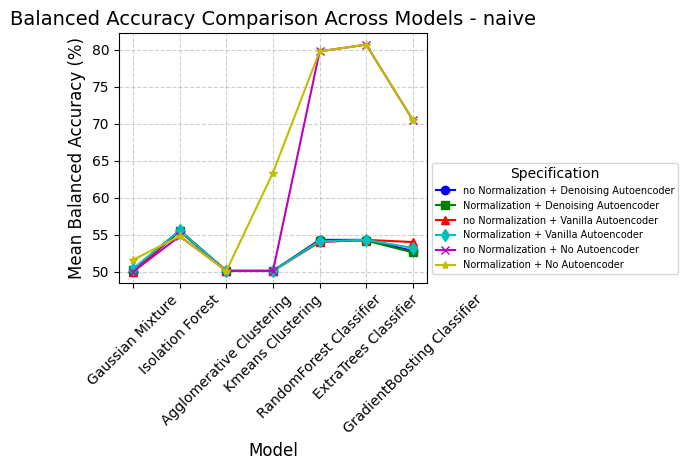

In [44]:
for (col, style, color) in zip(df.columns, styles, colors):
    plt.plot(df.index, df[col], style, color=color, label=col)

# Formatting the plot

plt.xlabel("Model", fontsize=12)
plt.ylabel("Mean Balanced Accuracy (%)", fontsize=12)
plt.title("Balanced Accuracy Comparison Across Models - naive", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Specification", fontsize=7, bbox_to_anchor=(1.0, 0.5), loc='upper left')
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()

# Show the plot
plt.show()

## Label assignment methods comparison


In [39]:
country = "SW_g_s"

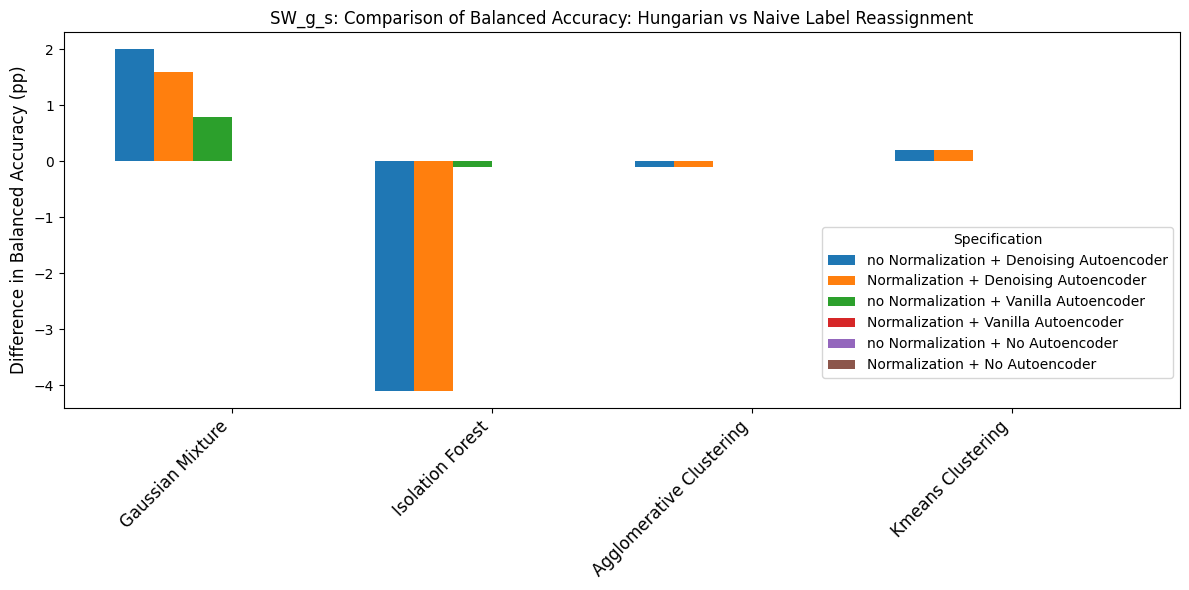

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the two datasets
file_hungarian = "graphs_for_discussion.xlsx"
file_naive = "graphs_for_discussion_naive.xlsx"

df_hungarian = pd.read_excel(file_hungarian,sheet_name=country, index_col=0 )
df_naive = pd.read_excel(file_naive, sheet_name=country, index_col=0)

# Define clustering algorithms (excluding classifiers)
clustering_algorithms = ["Gaussian Mixture", "Isolation Forest", "Agglomerative Clustering", "Kmeans Clustering"]

# Filter data to keep only clustering algorithms
df_hungarian = df_hungarian.loc[clustering_algorithms]
df_naive = df_naive.loc[clustering_algorithms]

# Compute the difference in percentage points (Hungarian - Naive)
df_diff = df_hungarian - df_naive

# Plot settings
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.15
x = np.arange(len(df_diff.index))

# Plot bars for each specification
for i, col in enumerate(df_diff.columns):
    ax.bar(x + i * bar_width, df_diff[col], width=bar_width, label=col)

# Formatting the plot
ax.set_xticks(x + (len(df_diff.columns) - 1) * bar_width / 2)
ax.set_xticklabels(df_diff.index, rotation=45, ha='right', fontsize=12)
ax.set_ylabel("Difference in Balanced Accuracy (pp)", fontsize=12)
ax.set_title(f"{country}: Comparison of Balanced Accuracy: Hungarian vs Naive Label Reassignment")
ax.legend(title="Specification", bbox_to_anchor=(1.0, 0.5), loc='upper right')

plt.tight_layout()
plt.show()
